In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, log_loss, confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
data1=pd.read_csv("OC_Marker.csv")
data1.head()

,Age,Menopause,CA19-9,CA72-4,AFP,CA125,HE4,CEA,TYPE,TYPE.1
0,47,0,36.48,6.42,3.58,15.36,183.94,1.40,0,BOT
1,61,1,19.98,10.17,34.24,2444.00,934.10,2.46,0,BOT
2,39,0,12.18,10.17,1.50,56.08,47.56,0.77,0,BOT
3,45,1,18.41,131.60,2.75,2555.00,853.50,0.82,0,BOT
4,45,0,11.15,10.17,2.36,1391.00,404.90,0.42,0,BOT


In [49]:
data2=pd.read_csv("OC_Genarel_Chem.csv")
data2.head()

,Age,AG,ALB,ALP,ALT,AST,BUN,Ca,CL,CO2CP,...,IBIL,K,Mg,Na,PHOS,TBIL,TP,UA,TYPE,TYPE.1
0,47,19.36,45.4,56,11,24,5.35,2.48,107.4,19.9,...,3.5,5.36,0.78,141.3,1.46,5.5,73.9,396.4,0,BOT
1,61,23.98,39.9,95,9,13,3.21,2.62,100.1,22.3,...,4.2,4.38,0.82,142.0,1.09,6.8,72.0,119.2,0,BOT
2,39,18.40,45.4,77,9,18,3.80,2.57,102.6,22.2,...,10.1,4.30,1.00,138.9,0.97,14.8,77.9,209.2,0,BOT
3,45,16.60,39.2,26,16,17,5.27,2.35,103.2,24.0,...,8.0,4.70,1.11,139.1,1.25,10.9,66.1,215.6,0,BOT
4,45,19.97,35.0,47,21,27,4.89,2.48,99.6,26.2,...,3.1,4.77,1.08,141.0,0.94,5.3,66.5,206.0,0,BOT


In [50]:
data3=pd.read_csv("OC_Blood_Routine.csv")
data3.head()

,Age,MPV,BASO#,BASO%,EO#,EO%,MCH,RDW,PDW,HGB,...,MONO#,MONO%,PLT,NEU,RBC,PCT,HCT,MCV,TYPE,TYPE.1
0,47,11.70,0.01,0.30,0.04,1.00,33.7,13.7,13.4,89.0,...,0.22,5.70,74,76.2,2.64,0.09,0.273,103.4,0,BOT
1,61,10.00,0.02,0.30,0.04,0.50,26.2,12.7,11.2,128.0,...,0.41,5.50,304,76.5,4.89,0.30,0.417,85.3,0,BOT
2,39,11.40,0.03,0.60,0.03,0.60,28.4,12.0,15.2,131.0,...,0.25,5.40,112,69.7,4.62,0.13,0.391,84.6,0,BOT
3,45,7.38,0.05,0.74,0.00,0.07,30.6,14.6,17.4,123.0,...,0.42,6.55,339,65.5,4.01,0.25,0.372,92.6,0,BOT
4,45,10.40,0.01,0.10,0.11,1.60,27.7,13.4,11.9,122.0,...,0.69,10.00,272,59.5,4.40,0.28,0.383,87.0,0,BOT


In [51]:
oc_blood_routine =data3.drop(columns=['TYPE','TYPE.1'])
oc_general_chem = data2.drop(columns=['TYPE','TYPE.1'])
print(oc_blood_routine)

     Age    MPV  BASO#  BASO%   EO#   EO%   MCH   RDW   PDW    HGB  LYM#  \
0     47  11.70   0.01   0.30  0.04  1.00  33.7  13.7  13.4   89.0  0.65   
1     61  10.00   0.02   0.30  0.04  0.50  26.2  12.7  11.2  128.0  1.27   
2     39  11.40   0.03   0.60  0.03  0.60  28.4  12.0  15.2  131.0  1.10   
3     45   7.38   0.05   0.74  0.00  0.07  30.6  14.6  17.4  123.0  1.73   
4     45  10.40   0.01   0.10  0.11  1.60  27.7  13.4  11.9  122.0  1.98   
..   ...    ...    ...    ...   ...   ...   ...   ...   ...    ...   ...   
344   52   9.90   0.00   0.00  0.01  0.30  31.1  11.9  10.8  142.0  1.18   
345   37  11.90   0.00   0.00  0.02  0.30  18.9  17.7  17.3   80.0  1.39   
346   59   9.70   0.02   0.60  0.05  1.50  29.4  11.6  10.4  144.0  1.10   
347   30  10.50   0.03   0.30  0.23  2.20  28.8  12.5  13.4  154.0  2.15   
348   39  10.30   0.01   0.20  0.04  0.80  31.0  12.1  11.0  128.0  1.52   

     LYM%  MONO#  MONO%  PLT    NEU   RBC   PCT    HCT    MCV  
0    16.8   0.22   5.70

In [52]:
combined_data = pd.concat([data1.set_index(['Age']),
                           oc_blood_routine.set_index(['Age']),
                           oc_general_chem.set_index(['Age'])],
                          axis=1).reset_index()

# Print the resulting combined dataset
print(combined_data)

     Age  Menopause  CA19-9  CA72-4    AFP    CA125     HE4   CEA  TYPE  \
0     47          0   36.48    6.42   3.58    15.36  183.94  1.40     0   
1     61          1   19.98   10.17  34.24  2444.00  934.10  2.46     0   
2     39          0   12.18   10.17   1.50    56.08   47.56  0.77     0   
3     45          1   18.41  131.60   2.75  2555.00  853.50  0.82     0   
4     45          0   11.15   10.17   2.36  1391.00  404.90  0.42     0   
..   ...        ...     ...     ...    ...      ...     ...   ...   ...   
344   52          0   15.11   10.17   2.09    50.80   31.45  1.74     1   
345   37          0    0.62   10.17   2.00    21.93   44.44  1.67     1   
346   59          1    2.18   10.17   2.83    51.33   42.65  2.31     1   
347   30          0   10.71   10.17   1.84    53.87   30.78  0.93     1   
348   39          0   28.79   10.17   1.61    46.45   33.42  0.76     1   

    TYPE.1  ...   GLO   GLU.  IBIL     K    Mg     Na  PHOS  TBIL    TP     UA  
0      BOT  ...  2

In [53]:
columns_t_drop = ['TYPE','TYPE.1']
x = combined_data.drop(columns=columns_t_drop,axis = 1)
x.head()

,Age,Menopause,CA19-9,CA72-4,AFP,CA125,HE4,CEA,MPV,BASO#,...,GLO,GLU.,IBIL,K,Mg,Na,PHOS,TBIL,TP,UA
0,47,0,36.48,6.42,3.58,15.36,183.94,1.40,11.70,0.01,...,28.5,4.67,3.5,5.36,0.78,141.3,1.46,5.5,73.9,396.4
1,61,1,19.98,10.17,34.24,2444.00,934.10,2.46,10.00,0.02,...,32.1,10.50,4.2,4.38,0.82,142.0,1.09,6.8,72.0,119.2
2,39,0,12.18,10.17,1.50,56.08,47.56,0.77,11.40,0.03,...,32.5,4.64,10.1,4.30,1.00,138.9,0.97,14.8,77.9,209.2
3,45,1,18.41,131.60,2.75,2555.00,853.50,0.82,7.38,0.05,...,26.9,4.76,8.0,4.70,1.11,139.1,1.25,10.9,66.1,215.6
4,45,0,11.15,10.17,2.36,1391.00,404.90,0.42,10.40,0.01,...,31.5,4.07,3.1,4.77,1.08,141.0,0.94,5.3,66.5,206.0


In [54]:
y = combined_data['TYPE']
y

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y

,TYPE
0,0
1,0
2,0
3,0
4,0
...,...
344,1
345,1
346,1
347,1


In [55]:
# KNN CLASSIFIER

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
ypred
ytest
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[27  5]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.86      0.79      0.82        38

    accuracy                           0.81        70
   macro avg       0.81      0.82      0.81        70
weighted avg       0.82      0.81      0.81        70



Text(0, 0.5, 'Error rate')

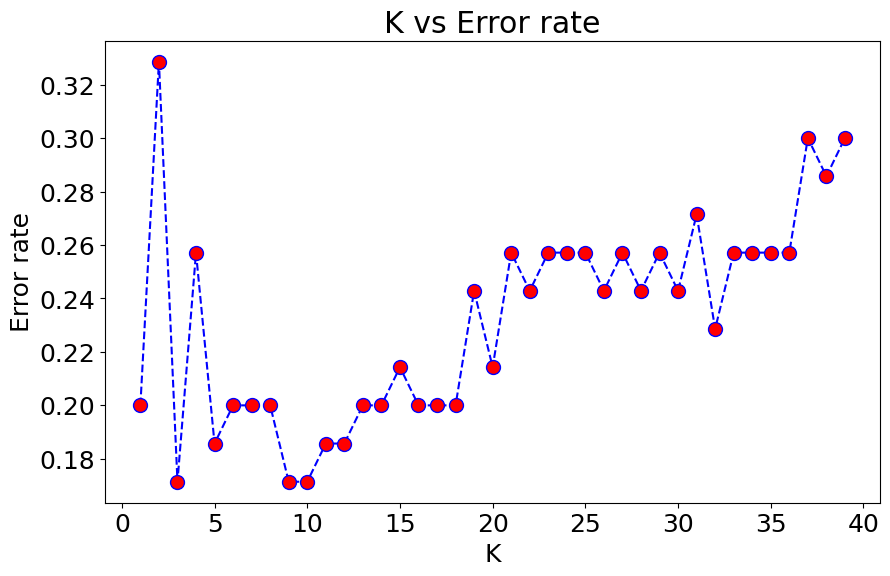

In [57]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)

    error_rate.append(np.mean(pred_i != ytest))

plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue',linestyle='--',markersize=10, markerfacecolor='red',marker='o')

plt.title('K vs Error rate')

plt.xlabel('K')

plt.ylabel('Error rate')

In [58]:
best_k=3
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(xtrain,ytrain)

ypred_new = knn.predict(xtest)

# Evaluate the predictions
print(confusion_matrix(ytest, ypred_new))
print(classification_report(ytest, ypred_new))


[[26  6]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.84      0.84      0.84        38

    accuracy                           0.83        70
   macro avg       0.83      0.83      0.83        70
weighted avg       0.83      0.83      0.83        70



In [59]:
# RANDOM FOREST CLASSIFIER

In [60]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score, log_loss  # Import metrics

In [61]:
combined_data.head()
X = combined_data.drop(['TYPE', 'TYPE.1'], axis=1)  # Features
y = combined_data['TYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfc=RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],  # Remove 'auto'
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

In [62]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

m_best = CV_rfc.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)
print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

Train accuracy: 0.9713
Test accuracy: 0.9000
Precision: 0.8462
Recall: 0.9706
F1: 0.9041
AUC: 0.9020
Log Loss: 3.6044
Training confusion matrix
[[127   8]
 [  0 144]]
Testing confusion matrix
[[30  6]
 [ 1 33]]


Feature Importance
0.05502082331114315
0.04750091174768027
0.017460392579272416
0.010233183265189918
0.012015709718392152
0.11555315747906646
0.22657729058934573
0.03609772261587976
0.011638926805570587
0.002278342130490054
0.004648279045952947
0.0036207809385013236
0.004615717066976132
0.011930728700977004
0.00615457766679008
0.009749240285996708
0.008731124930988978
0.013624220520717035
0.02460744452964298
0.004054913939303483
0.006738143277741917
0.01023705661751928
0.0914605476937399
0.0035787249472857786
0.00974162611204129
0.006159146597277525
0.006073447253958957
0.004825441739736474
0.03187379379477272
0.013763629577890516
0.006365890207210376
0.018073728820883882
0.007912627968357405
0.006972050960561583
0.0059143773873505485
0.012714862529945959
0.0048114418405207264
0.005036059489557501
0.005949431145958509
0.014280199147325335
0.01165609525417163
0.014192064164251693
0.003823924938755844
0.008379257420697122
0.01358977675286972
0.009139469523956558
0.016088611115167666
0.01

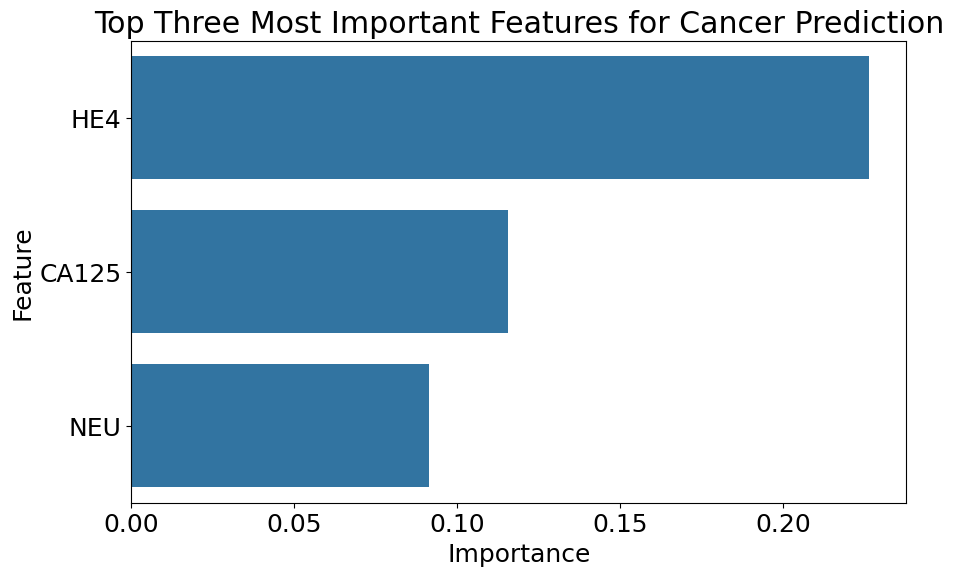

In [64]:

print("Feature Importance")
importances = m_best.feature_importances_
for i in importances:
    print(i)

pred_prob3 = m_best.predict_proba(X_test)
y_prob = pred_prob3[:, 1]
importances = m_best.feature_importances_

# Create a DataFrame to display feature importances along with their names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top three most important features
top_features = feature_importance_df.head(3)
print("Top Three Most Important Features:")
print(top_features)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)  # Removed palette
plt.title('Top Three Most Important Features for Cancer Prediction')
plt.show()


In [ ]:
# Decision Tree Classifier

Train accuracy: 0.9140
Test accuracy: 0.8143
Precision: 0.8283
Recall: 0.8143
F1: 0.8130
AUC: 0.8170
Log Loss: 6.6938
Training confusion matrix
[[117  18]
 [  6 138]]
Testing confusion matrix
[[26 10]
 [ 3 31]]
Feature Importance
Top Three Most Important Features:
   Feature  Importance
6      HE4    0.816087
7      CEA    0.144680
31     AST    0.039232


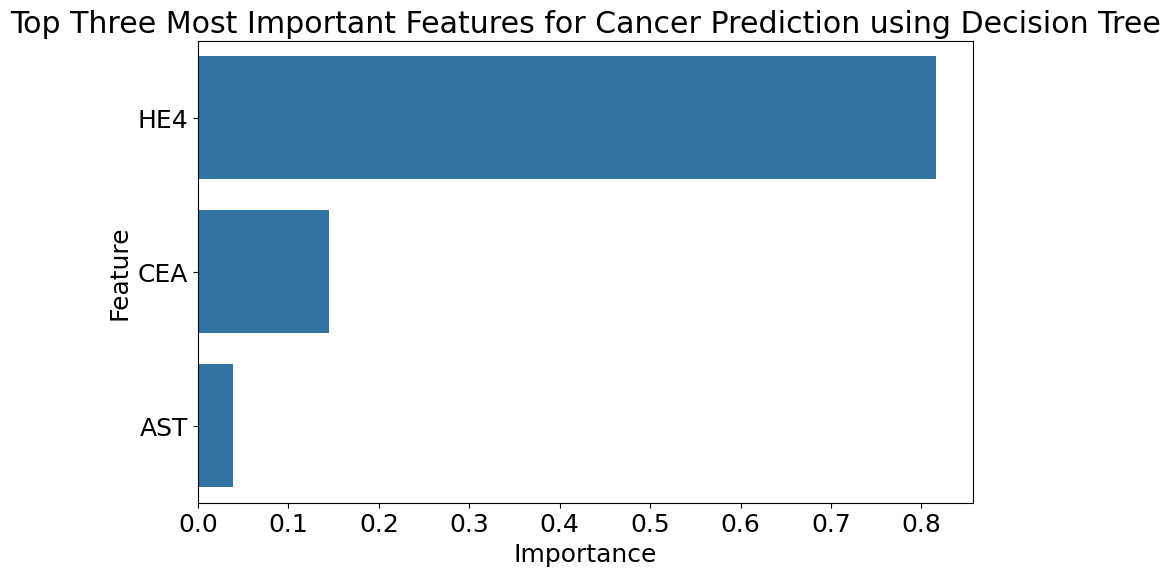

In [65]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Preparing the data
X = combined_data.drop(['TYPE', 'TYPE.1'], axis=1)  # Features
y = combined_data['TYPE']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)
CV_dtc.fit(X_train, y_train)

# Best model from GridSearch
m_best_dtc = CV_dtc.best_estimator_

# Predictions on training data
y_train_pred = m_best_dtc.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_pred)

# Predictions on test data
y_test_pred = m_best_dtc.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_test_pred)
precision = metrics.precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
auc = roc_auc_score(y_test, y_test_pred)
logloss = log_loss(y_test, y_test_pred)

# Print metrics
print("Train accuracy: {0:.4f}".format(train_acc))
print("Test accuracy: {0:.4f}".format(test_acc))
print("Precision: {0:.4f}".format(precision))
print("Recall: {0:.4f}".format(recall))
print("F1: {0:.4f}".format(f1))
print("AUC: {0:.4f}".format(auc))
print("Log Loss: {0:.4f}".format(logloss))

# Confusion matrices
print('Training confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_test_pred))

# Feature Importance
print("Feature Importance")
importances = m_best_dtc.feature_importances_

# Create a DataFrame to display feature importances along with their names
feature_importance_df_dtc = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df_dtc = feature_importance_df_dtc.sort_values(by='Importance', ascending=False)

# Display the top three most important features
top_features_dtc = feature_importance_df_dtc.head(3)
print("Top Three Most Important Features:")
print(top_features_dtc)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_dtc)
plt.title('Top Three Most Important Features for Cancer Prediction using Decision Tree')
plt.show()

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix


def create_and_evaluate_ensemble(combined_data):
    """Creates and evaluates an ensemble model with data preprocessing.

    Args:
        data (pd.DataFrame): The input dataset.

    Returns:
        dict: A dictionary containing the trained ensemble model and evaluation metrics.
    """
    # Data Preprocessing
    X = combined_data.drop(['TYPE', 'TYPE.1'], axis=1)  # Features
    y = combined_data['TYPE']  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Base Models with Hyperparameter Tuning
    rf_params = {
        'n_estimators': [200, 500],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [4, 5, 6, 7, 8],
        'criterion': ['gini', 'entropy']
    }
    rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5).fit(X_train, y_train).best_estimator_

    dt_params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    dt_model = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5).fit(X_train, y_train).best_estimator_

    # Ensemble Model
    ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('dt', dt_model)], voting='soft')
    ensemble_model.fit(X_train, y_train)

    # Evaluation
    y_train_pred = ensemble_model.predict(X_train)  # Predictions on training data
    y_test_pred = ensemble_model.predict(X_test)  # Predictions on testing data

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])
    logloss = log_loss(y_test, ensemble_model.predict_proba(X_test))

    # Print confusion matrices and metrics using the defined variables
    print('Training confusion matrix:')
    print(confusion_matrix(y_train, y_train_pred))
    print('Testing confusion matrix:')
    print(confusion_matrix(y_test, y_test_pred))

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Log Loss: {logloss:.4f}")

    return {
        'model': ensemble_model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'logloss': logloss
    }

# Example Usage
results = create_and_evaluate_ensemble(combined_data)
ensemble_model = results['model']
train_accuracy_en = results['train_accuracy']
test_accuracy_en = results['test_accuracy']
precision_en = results['precision']
recall_en = results['recall']
f1_en = results['f1']
auc_en = results['auc']
logloss_en = results['logloss']
print("Train accuracy: {0:.4f}".format(train_accuracy_en))
print("Test accuracy: {0:.4f}".format(test_accuracy_en))
print("Precision: {0:.4f}".format(precision_en))
print("Recall: {0:.4f}".format(recall_en))
print("F1: {0:.4f}".format(f1_en))
print("AUC: {0:.4f}".format(auc_en))
print("Log Loss: {0:.4f}".format(logloss_en))


Training confusion matrix:
[[117  18]
 [  2 142]]
Testing confusion matrix:
[[26 10]
 [ 3 31]]
Train Accuracy: 0.9283
Test Accuracy: 0.8143
Precision: 0.8283
Recall: 0.8143
F1 Score: 0.8130
AUC: 0.9322
Log Loss: 0.3740
Train accuracy: 0.9283
Test accuracy: 0.8143
Precision: 0.8283
Recall: 0.8143
F1: 0.8130
AUC: 0.9322
Log Loss: 0.3740


In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics_names = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Log Loss']

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """ Evaluate the trained model and print relevant metrics. """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_test_pred, average='weighted'),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),  # Ensure correct column for binary
        'Log Loss': log_loss(y_test, model.predict_proba(X_test)),
    }

    # Print confusion matrices
    print('Training confusion matrix')
    print(confusion_matrix(y_train, y_train_pred))
    print('Testing confusion matrix')
    print(confusion_matrix(y_test, y_test_pred))

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    return metrics  # Return metrics for further use

X = combined_data.drop(['TYPE', 'TYPE.1'], axis=1)  # Features
y = combined_data['TYPE']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Model
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
print("Evaluating KNN Model...")
metrics_knn = evaluate_model(knn, X_train, y_train, X_test, y_test, model_name='KNN')

# Random Forest Model with GridSearchCV
rfc = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=5)
CV_rfc.fit(X_train, y_train)
m_best_rf = CV_rfc.best_estimator_

print("\nEvaluating Random Forest Model...")
metrics_rf = evaluate_model(m_best_rf, X_train, y_train, X_test, y_test, model_name='Random Forest')

# Decision Tree Model with GridSearchCV
dtc = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dt, cv=5)
CV_dtc.fit(X_train, y_train)
m_best_dtc = CV_dtc.best_estimator_

print("\nEvaluating Decision Tree Model...")
metrics_dt = evaluate_model(m_best_dtc, X_train, y_train, X_test, y_test, model_name='Decision Tree')

# Ensemble Model Evaluation - Using evaluate_model function
print("\nEvaluating Ensemble Model...")
ensemble_results = create_and_evaluate_ensemble(combined_data)
ensemble_model = ensemble_results['model']
metrics_ensemble = evaluate_model(ensemble_model, X_train, y_train, X_test, y_test, model_name='Ensemble')


# Store ensemble metrics for plotting
metrics_ensemble = {
    'Train Accuracy': ensemble_results['train_accuracy'],
    'Test Accuracy': ensemble_results['test_accuracy'],
    'Precision': ensemble_results['precision'],
    'Recall': ensemble_results['recall'],
    'F1 Score': ensemble_results['f1'],
    'AUC': ensemble_results['auc'],
    'Log Loss': ensemble_results['logloss']
}


# Store evaluation metrics for plotting
metrics_data = {
    'Model': ['KNN', 'Random Forest', 'Decision Tree'],
    'Train Accuracy': [metrics_knn['Train Accuracy'], metrics_rf['Train Accuracy'], metrics_dt['Train Accuracy']],
    'Test Accuracy': [metrics_knn['Test Accuracy'], metrics_rf['Test Accuracy'], metrics_dt['Test Accuracy']],
    'Precision': [metrics_knn['Precision'], metrics_rf['Precision'], metrics_dt['Precision']],
    'Recall': [metrics_knn['Recall'], metrics_rf['Recall'], metrics_dt['Recall']],
    'F1 Score': [metrics_knn['F1 Score'], metrics_rf['F1 Score'], metrics_dt['F1 Score']],
    'AUC': [metrics_knn['AUC'], metrics_rf['AUC'], metrics_dt['AUC']],
    'Log Loss': [metrics_knn['Log Loss'], metrics_rf['Log Loss'], metrics_dt['Log Loss']]
}

metrics_data['Model'].append('Ensemble')
for metric in metrics_names:
    metrics_data[metric].append(metrics_ensemble[metric])



metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)



Evaluating KNN Model...
Training confusion matrix
[[114  21]
 [  7 137]]
Testing confusion matrix
[[28  8]
 [ 3 31]]
Train Accuracy: 0.8996
Test Accuracy: 0.8429
Precision: 0.8506
Recall: 0.8429
F1 Score: 0.8424
AUC: 0.8803
Log Loss: 2.7614


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Evaluating Random Forest Model...
Training confusion matrix
[[127   8]
 [  0 144]]
Testing confusion matrix
[[30  6]
 [ 1 33]]
Train Accuracy: 0.9713
Test Accuracy: 0.9000
Precision: 0.9087
Recall: 0.9000
F1 Score: 0.8997
AUC: 0.9412
Log Loss: 0.3424

Evaluating Decision Tree Model...
Training confusion matrix
[[117  18]
 [  6 138]]
Testing confusion matrix
[[26 10]
 [ 3 31]]
Train Accuracy: 0.9140
Test Accuracy: 0.8143
Precision: 0.8283
Recall: 0.8143
F1 Score: 0.8130
AUC: 0.8080
Log Loss: 1.4555

Evaluating Ensemble Model...
Training confusion matrix:
[[117  18]
 [  2 142]]
Testing confusion matrix:
[[26 10]
 [ 3 31]]
Train Accuracy: 0.9283
Test Accuracy: 0.8143
Precision: 0.8283
Recall: 0.8143
F1 Score: 0.8130
AUC: 0.9322
Log Loss: 0.3740
Training confusion matrix
[[135   0]
 [144   0]]
Testing confusion matrix
[[36  0]
 [34  0]]
Train Accuracy: 0.4839
Test Accuracy: 0.5143
Precision: 0.2645
Recall: 0.5143
F1 Score: 0.3493
AUC: 0.3864
Log Loss: 1.0529
           Model  Train Accura

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

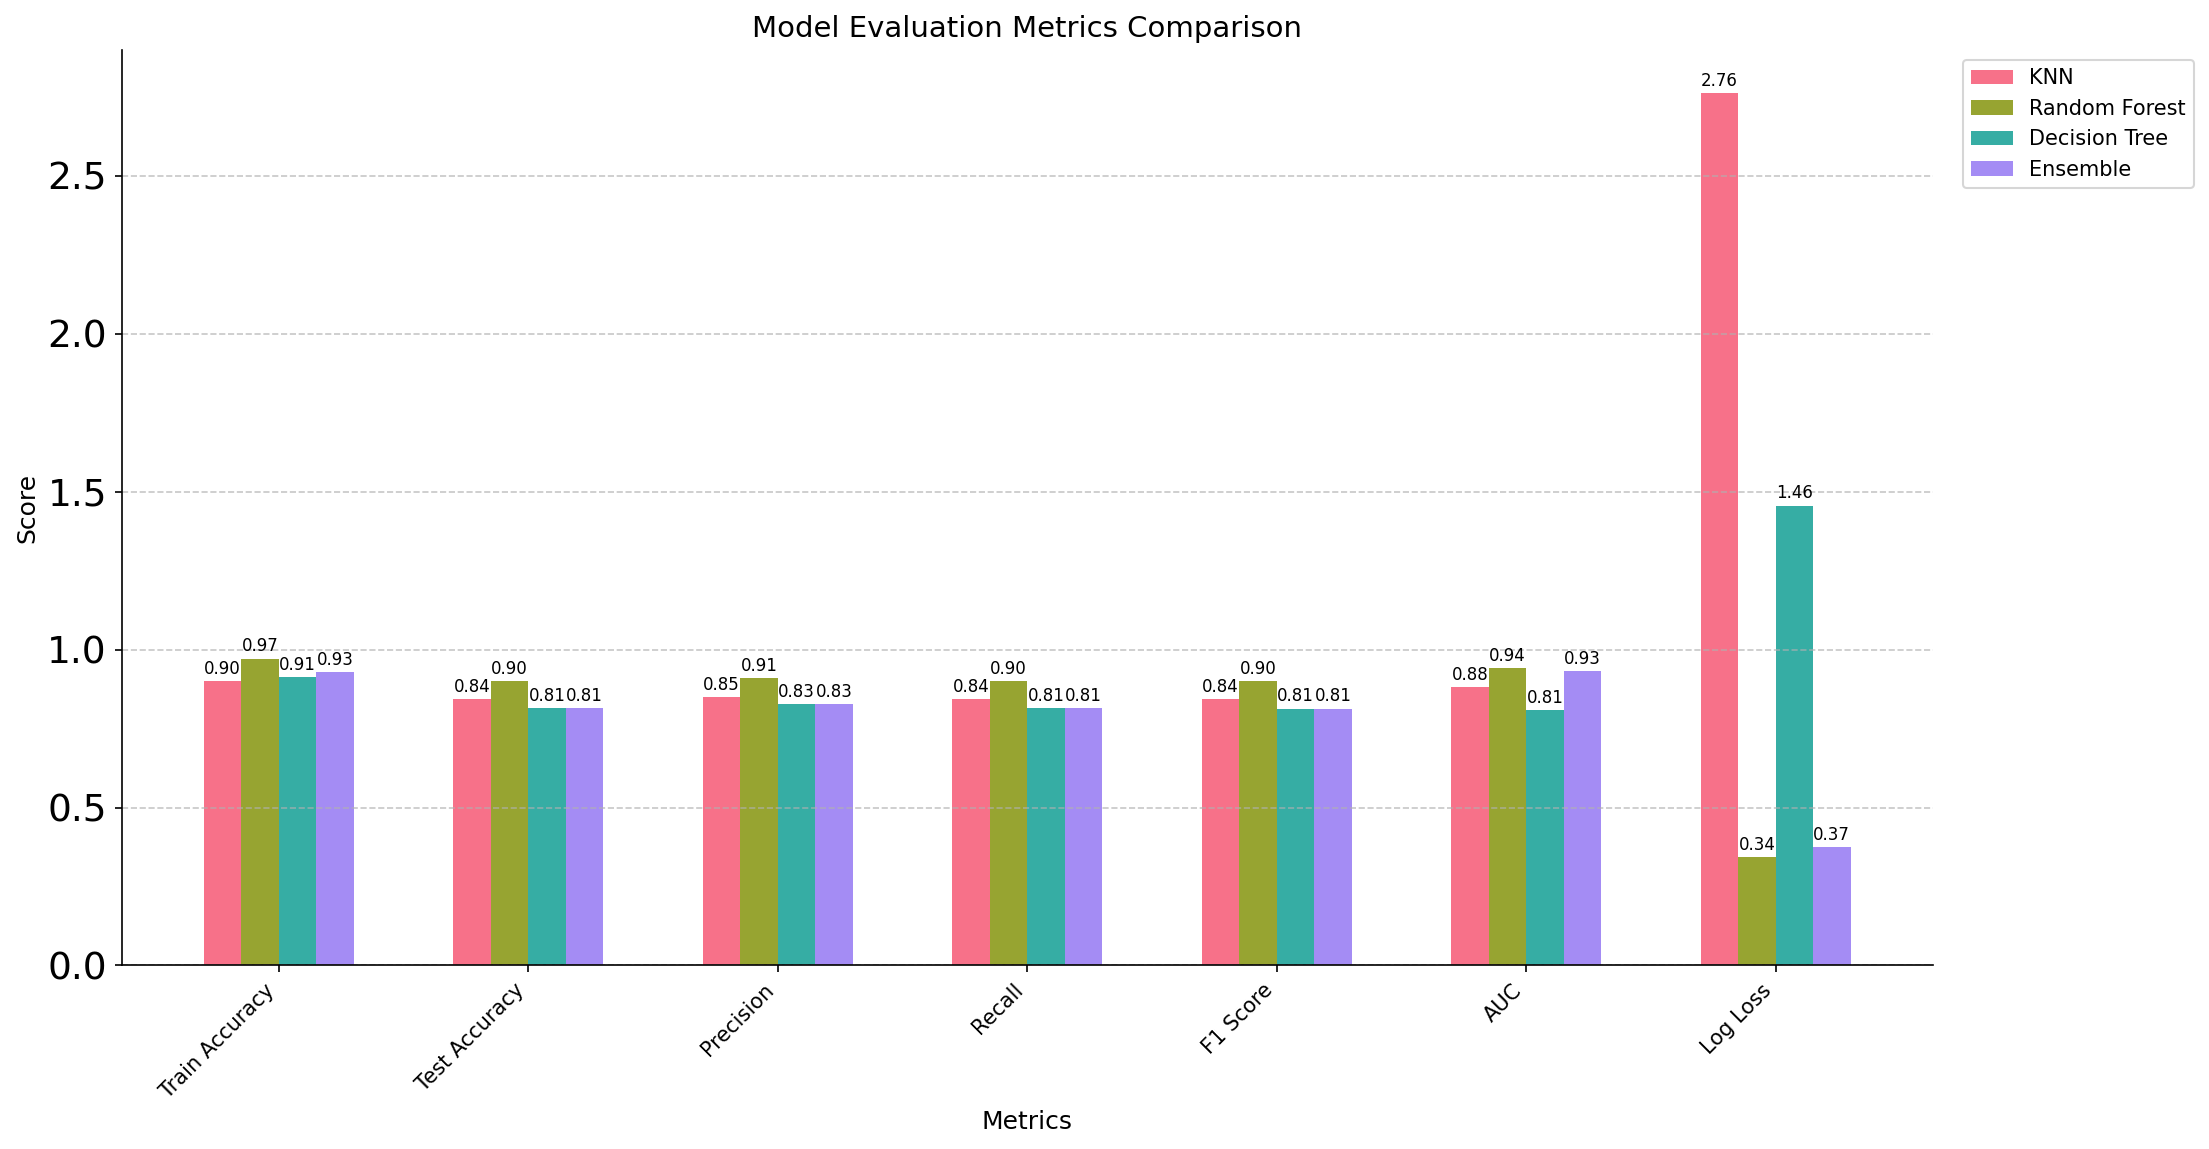

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


metrics_names = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Log Loss']

colors = sns.color_palette("husl", 4)

# Set up the figure and axes
num_metrics = len(metrics_names)
num_models = 4  # KNN, Random Forest, Decision Tree, Ensemble
bar_width = 0.15
index = np.arange(num_metrics)

fig, ax = plt.subplots(figsize=(15, 8), dpi=150)

# Create grouped bars for each model
for i, model_name in enumerate(['KNN', 'Random Forest', 'Decision Tree', 'Ensemble']):
    model_metrics = [metrics_knn, metrics_rf, metrics_dt, metrics_ensemble][i]
    ax.bar(index + i * bar_width, [model_metrics[metric] for metric in metrics_names],
           bar_width, label=model_name, color=colors[i])

# Add labels, titles, custom x-axis tick labels, etc.
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Evaluation Metrics Comparison', fontsize=14)
ax.set_xticks(index + (num_models - 1) * bar_width / 2)  # Center tick labels
ax.set_xticklabels(metrics_names, rotation=45, ha='right', fontsize=10)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=10) # Outside legend

# Add grid and remove spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value annotations on top of the bars
for i, model_name in enumerate(['KNN', 'Random Forest', 'Decision Tree', 'Ensemble']):
    model_metrics = [metrics_knn, metrics_rf, metrics_dt, metrics_ensemble][i]
    for j, metric in enumerate(metrics_names):
        yval = model_metrics[metric]
        ax.text(index[j] + i * bar_width, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()